In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import os
import time

In [29]:
def income_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
    response = requests.get(url)
    with open(os.path.join("Income", f"{ticker}_inc.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./Income/{ticker}_inc.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

Please enter a ticker MSFT


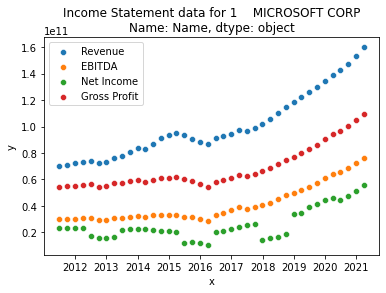

In [68]:
ticker = input('Please enter a ticker')
ticker_df = income_puller(ticker)
ticker_df.head()

ticker_name = stock_list[stock_list['Ticker']==ticker]['Name']

sns.scatterplot(data=ticker_df,x=ticker_df.index,y='Revenue')
sns.scatterplot(data=ticker_df,x=ticker_df.index,y='EBITDA')
sns.scatterplot(data=ticker_df,x=ticker_df.index,y='Net Income Common')
sns.scatterplot(data=ticker_df,x=ticker_df.index,y='Gross Profit').set(xlabel='x',ylabel='y')
plt.title(f'Income Statement data for {ticker_name}');
plt.legend(labels=['Revenue','EBITDA','Net Income','Gross Profit']);

In [69]:
ticker_name = str(stock_list[stock_list['Ticker']==ticker]['Name'])
ticker_name[:-26]

'1    MICROSOFT CORP'

In [70]:
stock_list = pd.read_csv('list_of_stocks.csv')
stock_list.head()

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,CUSIP,ISIN,SEDOL,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
0,AAPL,APPLE INC,Information Technology,Equity,"1,875,566,056.60",4.85,"1,875,566,056.60","14,040,770.00",37833100,US0378331005,2046251,133.58,United States,NASDAQ,USD,1,USD,--
1,MSFT,MICROSOFT CORP,Information Technology,Equity,"1,709,995,853.92",4.42,"1,709,995,853.92","6,717,457.00",594918104,US5949181045,2588173,254.56,United States,NASDAQ,USD,1,USD,--
2,AMZN,AMAZON COM INC,Consumer Discretionary,Equity,"1,319,116,860.50",3.41,"1,319,116,860.50","381,413.00",23135106,US0231351067,2000019,"3,458.50",United States,NASDAQ,USD,1,USD,--
3,FB,FACEBOOK CLASS A INC,Communication,Equity,"659,282,587.10",1.71,"659,282,587.10","2,146,801.00",30303M102,US30303M1027,B7TL820,307.1,United States,NASDAQ,USD,1,USD,--
4,GOOGL,ALPHABET INC CLASS A,Communication,Equity,"633,933,024.00",1.64,"633,933,024.00","268,725.00",02079K305,US02079K3059,BYVY8G0,"2,359.04",United States,NASDAQ,USD,1,USD,--


86    LOCKHEED MARTIN CORP
Name: Name, dtype: object

In [3]:
# this code pulls in the .xlsx file
#url='https://stockrow.com/api/companies/AAPL/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
#response = requests.get(url)
#with open(os.path.join("Income", "AAPL_inc.xlsx"), 'wb') as f:
    f.write(response.content)

In [4]:
ticker_list = stock_list['Ticker'][:10]

for ticker in ticker_list:
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
    response = requests.get(url)
    with open(os.path.join("Income", f"{ticker}_inc.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)

In [5]:
#read in the DataFrame, transposed
AAPL_df = pd.read_excel('./Income/AAPL_inc.xlsx').T
# change the first row to the columns
AAPL_df.columns = AAPL_df.iloc[0]
#remove the first row
AAPL_df = AAPL_df.iloc[1:]

AAPL_df.head()

Unnamed: 0,Revenue,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expenses,Operating Income,Interest Expense (Operating),Non-operating Income/Expense,Non-operating Interest Expenses,EBT,...,Free Cash Flow Margin,EBITDA,EBIT,"EPS (Diluted, from Cont. Ops)","EPS (Basic, Consolidated)","EPS (Basic, from Continuous Ops)",Income from Continuous Operations,Consolidated Net Income/Loss,EBITDA Margin,Operating Cash Flow Margin
2021-03-31 00:00:00,3.25208e+11,1.9581e+11,1.29398e+11,2.0161e+10,2.0712e+10,8.8903e+10,NaN,7e+07,NaN,8.9628e+10,...,0.2782,NaN,8.8903e+10,4.4649,4.5129,4.5129,7.6311e+10,7.6311e+10,0,0.3062
2020-12-31 00:00:00,2.93971e+11,1.80236e+11,1.13735e+11,1.9464e+10,2.035e+10,7.4253e+10,2.726e+09,-7.46e+08,3.465e+09,7.4752e+10,...,0.2729,8.4827e+10,7.4253e+10,3.7076,3.7474,3.7474,6.393e+10,6.393e+10,0.2886,0.3025
2020-09-30 00:00:00,2.7415e+11,1.70143e+11,1.04007e+11,1.8752e+10,1.9916e+10,6.6288e+10,2.873e+09,-6.8e+07,3.763e+09,6.7091e+10,...,0.2676,7.6395e+10,6.6288e+10,3.2753,3.3085,3.3085,5.7411e+10,5.7411e+10,0.2787,0.2943
2020-06-30 00:00:00,2.73524e+11,1.69798e+11,1.03726e+11,1.7884e+10,1.9558e+10,6.7138e+10,NaN,5.31e+08,NaN,6.8317e+10,...,0.2622,7.7817e+10,6.7138e+10,3.2976,3.3262,3.3262,5.8424e+10,5.8424e+10,0.2845,0.2925
2020-03-31 00:00:00,2.67918e+11,1.66013e+11,1.01905e+11,1.7383e+10,1.9153e+10,6.5591e+10,NaN,6.62e+08,NaN,6.7091e+10,...,0.2487,7.7083e+10,6.5591e+10,3.1973,3.2233,3.2233,5.7215e+10,5.7215e+10,0.2877,0.2813


In [17]:
#read in the DataFrame, transposed
MSFT_df = pd.read_excel('./Income/MSFT_inc.xlsx').T
# change the first row to the columns
MSFT_df.columns = MSFT_df.iloc[0]
#remove the first row
MSFT_df = MSFT_df.iloc[1:]

MSFT_df.head()

Unnamed: 0,Revenue,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expenses,Operating Income,Interest Expense (Operating),Non-operating Income/Expense,Non-operating Interest Expenses,EBT,...,Free Cash Flow Margin,EBITDA,EBIT,"EPS (Diluted, from Cont. Ops)","EPS (Basic, Consolidated)","EPS (Basic, from Continuous Ops)",Income from Continuous Operations,Consolidated Net Income/Loss,EBITDA Margin,Operating Cash Flow Margin
2021-03-31 00:00:00,1.59969e+11,5.058e+10,1.09389e+11,2.0243e+10,2.4918e+10,6.4228e+10,NaN,8.1e+07,2.343e+09,6.5119e+10,...,0.3362,7.6074e+10,6.4228e+10,7.3471,7.4103,7.4103,5.6015e+10,5.6015e+10,0.4756,0.4545
2020-12-31 00:00:00,1.53284e+11,4.851e+10,1.04774e+11,1.9926e+10,2.4693e+10,6.0155e+10,2.46e+09,-2.24e+08,2.383e+09,6.0726e+10,...,0.329,7.2183e+10,6.0155e+10,6.7134,6.7744,6.7744,5.131e+10,5.131e+10,0.4709,0.4438
2020-09-30 00:00:00,1.47114e+11,4.6674e+10,1.0044e+11,1.963e+10,2.4661e+10,5.6149e+10,2.543e+09,-1.6e+08,2.526e+09,5.6474e+10,...,0.3346,6.8619e+10,5.6149e+10,6.1977,6.2562,6.2562,4.7496e+10,4.7496e+10,0.4664,0.4499
2020-06-30 00:00:00,1.43015e+11,4.6078e+10,9.6937e+10,1.9269e+10,2.4709e+10,5.2959e+10,NaN,-4.2e+07,2.593e+09,5.3036e+10,...,0.3163,6.5755e+10,5.2959e+10,5.7635,5.8187,5.8187,4.4281e+10,4.4281e+10,0.4598,0.4243
2020-03-31 00:00:00,1.38699e+11,4.4151e+10,9.4548e+10,1.8568e+10,2.4023e+10,5.1957e+10,NaN,1.11e+08,2.667e+09,5.221e+10,...,0.3126,6.4173e+10,5.1957e+10,6.0041,6.0628,6.0628,4.6266e+10,4.6266e+10,0.4627,0.419


In [9]:
AAPL_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 2021-03-31 00:00:00 to 2011-06-30 00:00:00
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Revenue                            40 non-null     object
 1   Cost of Revenue                    40 non-null     object
 2   Gross Profit                       40 non-null     object
 3   R&D Expenses                       40 non-null     object
 4   SG&A Expenses                      40 non-null     object
 5   Operating Income                   40 non-null     object
 6   Interest Expense (Operating)       2 non-null      object
 7   Non-operating Income/Expense       40 non-null     object
 8   Non-operating Interest Expenses    2 non-null      object
 9   EBT                                40 non-null     object
 10  Income Tax Provision               40 non-null     object
 11  Income after Tax                   40 non-n

In [19]:
MSFT_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 2021-03-31 00:00:00 to 2011-06-30 00:00:00
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Revenue                            40 non-null     object
 1   Cost of Revenue                    40 non-null     object
 2   Gross Profit                       40 non-null     object
 3   R&D Expenses                       40 non-null     object
 4   SG&A Expenses                      40 non-null     object
 5   Operating Income                   40 non-null     object
 6   Interest Expense (Operating)       2 non-null      object
 7   Non-operating Income/Expense       39 non-null     object
 8   Non-operating Interest Expenses    40 non-null     object
 9   EBT                                40 non-null     object
 10  Income Tax Provision               40 non-null     object
 11  Income after Tax                   40 non-n

No handles with labels found to put in legend.


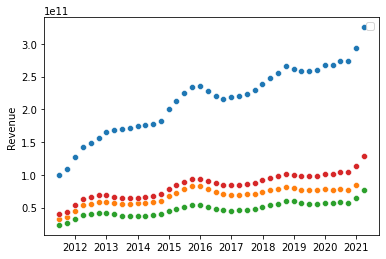

In [16]:
sns.scatterplot(data=AAPL_df,x=AAPL_df.index,y='Revenue')
sns.scatterplot(data=AAPL_df,x=AAPL_df.index,y='EBITDA')
sns.scatterplot(data=AAPL_df,x=AAPL_df.index,y='Net Income Common')
sns.scatterplot(data=AAPL_df,x=AAPL_df.index,y='Gross Profit')
plt.legend();

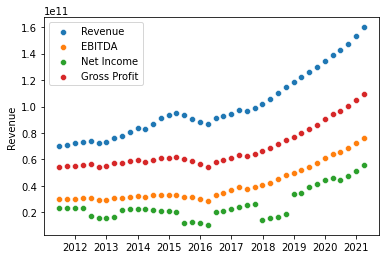

In [25]:
sns.scatterplot(data=MSFT_df,x=MSFT_df.index,y='Revenue')
sns.scatterplot(data=MSFT_df,x=MSFT_df.index,y='EBITDA')
sns.scatterplot(data=MSFT_df,x=MSFT_df.index,y='Net Income Common')
sns.scatterplot(data=MSFT_df,x=MSFT_df.index,y='Gross Profit')
plt.legend(labels=['Revenue','EBITDA','Net Income','Gross Profit']);

<AxesSubplot:ylabel='Revenue'>

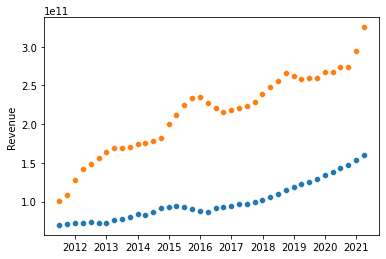

In [26]:
sns.scatterplot(data=MSFT_df,x=MSFT_df.index,y='Revenue')
sns.scatterplot(data=AAPL_df,x=AAPL_df.index,y='Revenue')
plt.legend()